In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
df = pd.read_csv("../btcNews_Data.csv")

In [5]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,save lives earn bitcoin with new ems signpos...,future use cases for blockchain technology pr...,land of the rising bitcoin bitcoin,fiat cannot support the new economy we need b...,blockchain alliance bitcoin and law enforceme...,,has released an enterprise ready blockchain...,blockstream to transmit bitcoin data to earth ...,pr ambrosus partners with trek therapeutics t...,goldman sachs technical analyst predicts bitco...,we ve created a telegram channel to display th...,bitcoin s current exchange rate is 4325 46 usd...,cryptocurrency ping tracking,porn star tempts russian prime minister to leg...,bitcoin endures instantaneous flash crash on m...,microsoft press office we ve restored bitcoi...,bangladesh authorities on hunt for bitcoin t...,,us lawmakers eye national crypto regulation ...,pr smart contract platform fabric token raise...,rt lawsuit,assemble protocol asm is now supported on co...,leveraging ongoing investment trend upcoming ...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,the forum s all star ama event,decentralization is key for car innovation to ...,meerkat star suzanne nguyen dreams of bitcoin...,what do you think has segwit been released ye...,good bitcoin bad bitcoin avoiding fraud amp...,uk regulator warns investors bitcoin trading i...,venezuelan bitcoin mining continues despite go...,fisco designed the bond like a regular corpor...,bitcoin cash now commands over 20 of btc s to...,pr robert binning ceo of streamspace to spea...,ukraine proposes law to completely legalize cr...,russia s finance ministry proposes registering...,chinese power company responds to document ind...,pr nuls the global open source platform for b...,pr game machine first blockchain ecosystem ...,south korean regulator supports normal crypt...,digitalx,how to protect yourself against dns attacks wh...,,new party in ukraine to fund itself only with ...,a single operator deploys over 350 new bitcoi...,nigeria s latest total traded volumes figure w...,the next bitcoin cash may 15th upgrade will br...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing t

In [6]:
len(df)

2146

In [7]:
df.dtypes


date         object
top_0        object
top_1        object
top_2        object
top_3        object
top_4        object
top_5        object
top_6        object
top_7        object
top_8        object
top_9        object
top_10       object
top_11       object
top_12       object
top_13       object
top_14       object
top_15       object
top_16       object
top_17       object
top_18       object
top_19       object
top_20       object
top_21       object
top_22       object
top_23       object
top_24       object
top_25       object
top_26       object
top_27       object
top_28       object
top_29       object
top_30       object
top_31       object
top_32       object
top_33       object
top_34       object
top_35       object
price       float64
open        float64
high        float64
low         float64
vol.         object
change %     object
dtype: object

In [8]:
df.isna().sum()

date           0
top_0          0
top_1         27
top_2         99
top_3        297
top_4        517
top_5        764
top_6        990
top_7       1166
top_8       1304
top_9       1404
top_10      1476
top_11      1559
top_12      1644
top_13      1712
top_14      1779
top_15      1842
top_16      1877
top_17      1917
top_18      1949
top_19      1980
top_20      2003
top_21      2036
top_22      2064
top_23      2080
top_24      2093
top_25      2108
top_26      2118
top_27      2124
top_28      2127
top_29      2130
top_30      2134
top_31      2135
top_32      2135
top_33      2141
top_34      2143
top_35      2145
price          0
open           0
high           0
low            0
vol.           0
change %       0
dtype: int64

## Exploratory Data Analysis (EDA)

In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df_1 = df.set_index('date')
# Remove '%' and convert 'change %' to a numeric column
df_1['change %'] = df_1['change %'].str.replace('%', '').astype(float)

In [10]:
from functions import convert_to_numeric
# Apply the conversion to the 'vol.' column
df_1['vol.'] = df_1['vol.'].apply(convert_to_numeric)

In [11]:
df_1.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,bringing to market a physical bitcoin etf in...,mohammad reza sharafi head of the cryptocurr...,6 trillion global insurance industry is about...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28949.4,28866.8,29298.8,28025.0,136690.0,0.28


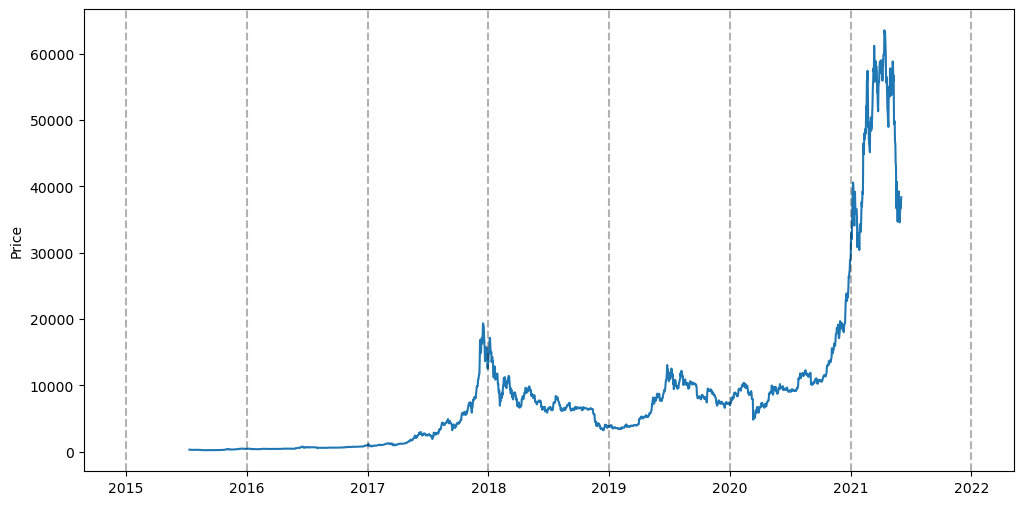

In [12]:
plt.figure(figsize= (12,6))
plt.plot(df_1.price)
plt.ylabel('Price')
for year in range (2015, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.3)

In [13]:
df_1.describe()

,price,open,high,low,vol.,change %
count,2146.000000,2146.000000,2146.000000,2146.000000,2.146000e+03,2146.000000
mean,8649.910485,8632.001165,8896.109925,8336.822973,5.160116e+05,0.303504
std,12071.304908,12055.215223,12454.354964,11588.466405,1.311607e+06,3.975095
min,211.400000,211.400000,226.600000,196.300000,2.400000e+03,-39.180000
25%,896.000000,894.600000,914.700000,871.800000,6.817250e+04,-1.180000
50%,6394.950000,6391.000000,6528.800000,6278.900000,1.446900e+05,0.210000
75%,9578.575000,9568.525000,9750.700000,9325.050000,5.157025e+05,1.817500
max,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,25.560000


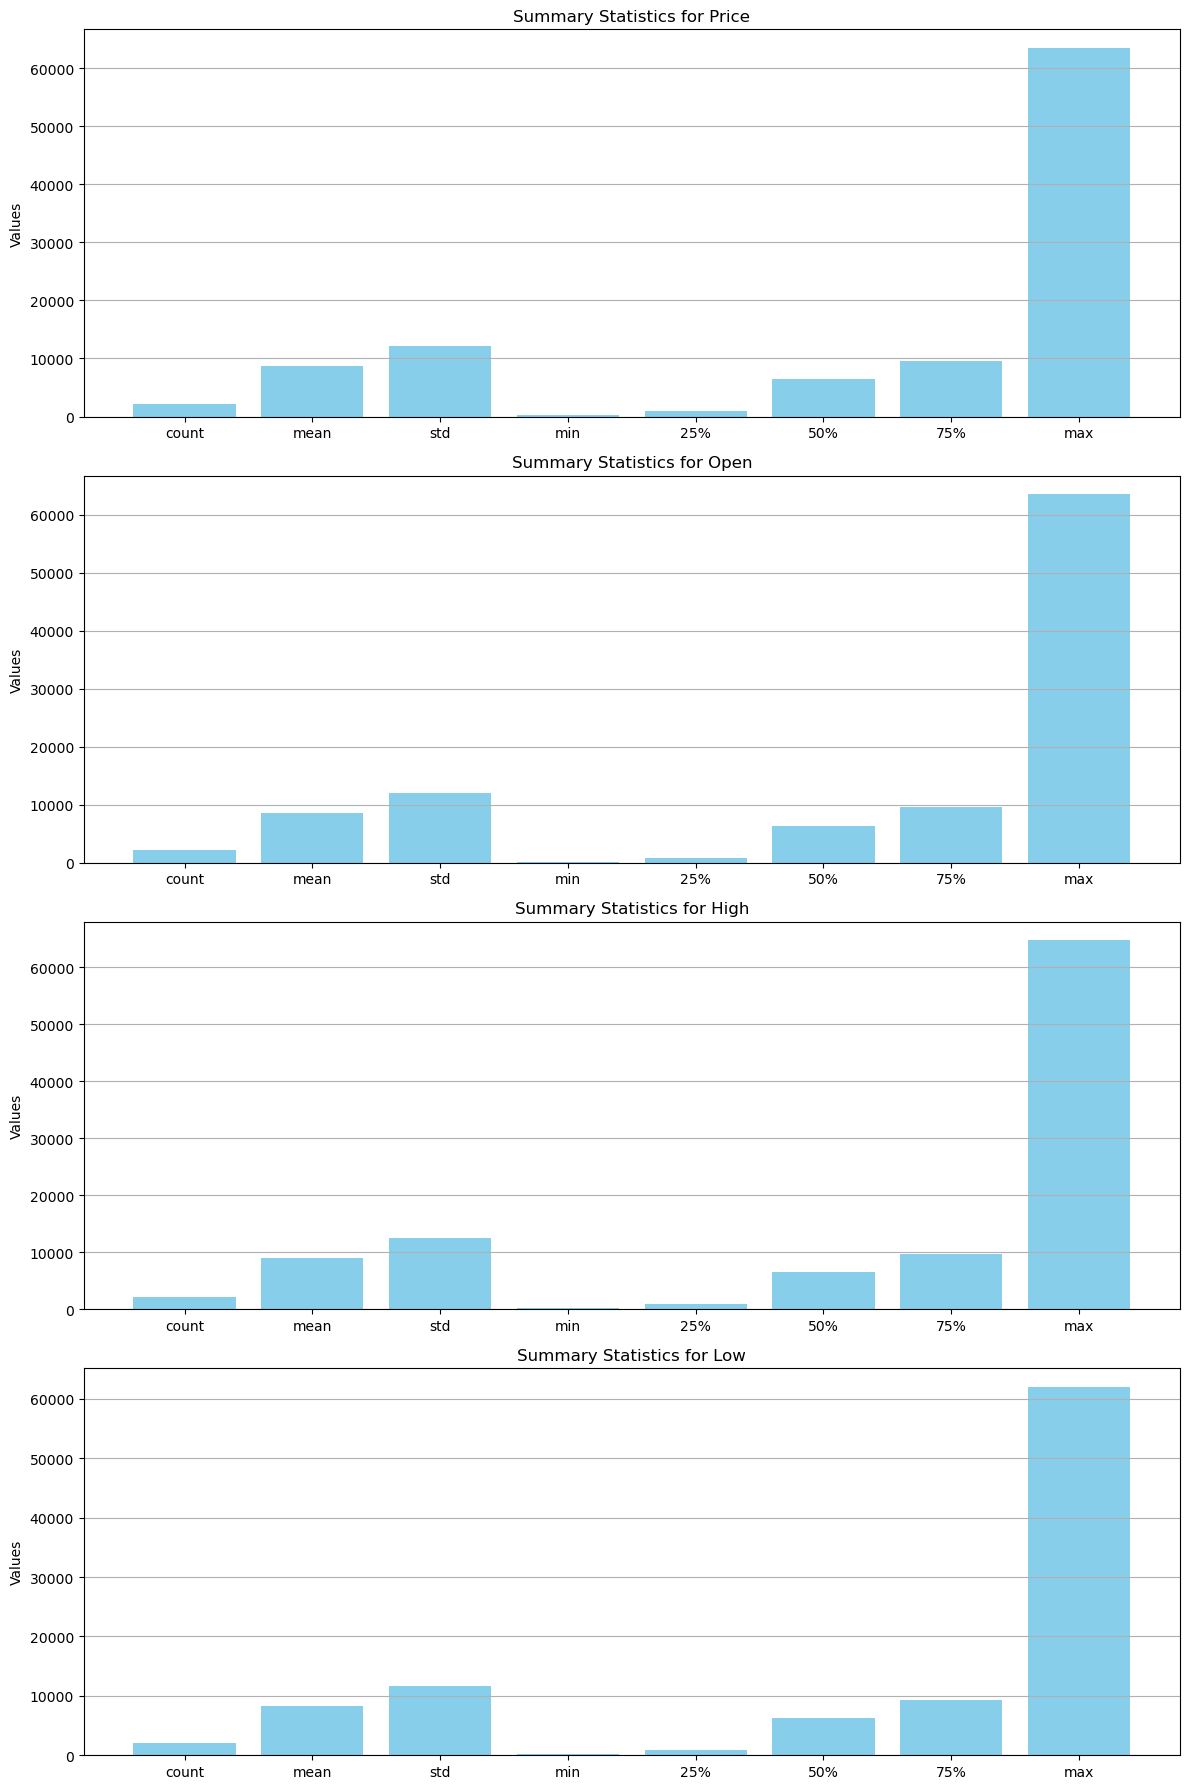

In [14]:
summary_stats = df_1[['price', 'open', 'high', 'low']].describe()

# Transpose the summary statistics to make it easier to plot
summary_stats = summary_stats.T

# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Create individual plots for each metric
for i, column in enumerate(summary_stats.index):
    axes[i].bar(summary_stats.columns, summary_stats.loc[column], color='skyblue')
    axes[i].set_title(f'Summary Statistics for {column.capitalize()}')
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

### Parametric and Non Parametric

For normally distributed data, parametric like t-test, Anova, preason corelation

#### Looking into normal distribution

##### Bining Change %

In [15]:
# Define the bins and labels based on the min and max values
bins = [-40, -30, -20, -10, -5, 0, 5, 10, 20, 30]  # Adjust for your data range
labels = ['-40% to -30%', '-30% to -20%', '-20% to -10%', '-10% to -5%', 
          '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% to 30%']

# Bin the 'change %' data
df_1['change % bin'] = pd.cut(df_1['change %'], bins=bins, labels=labels)


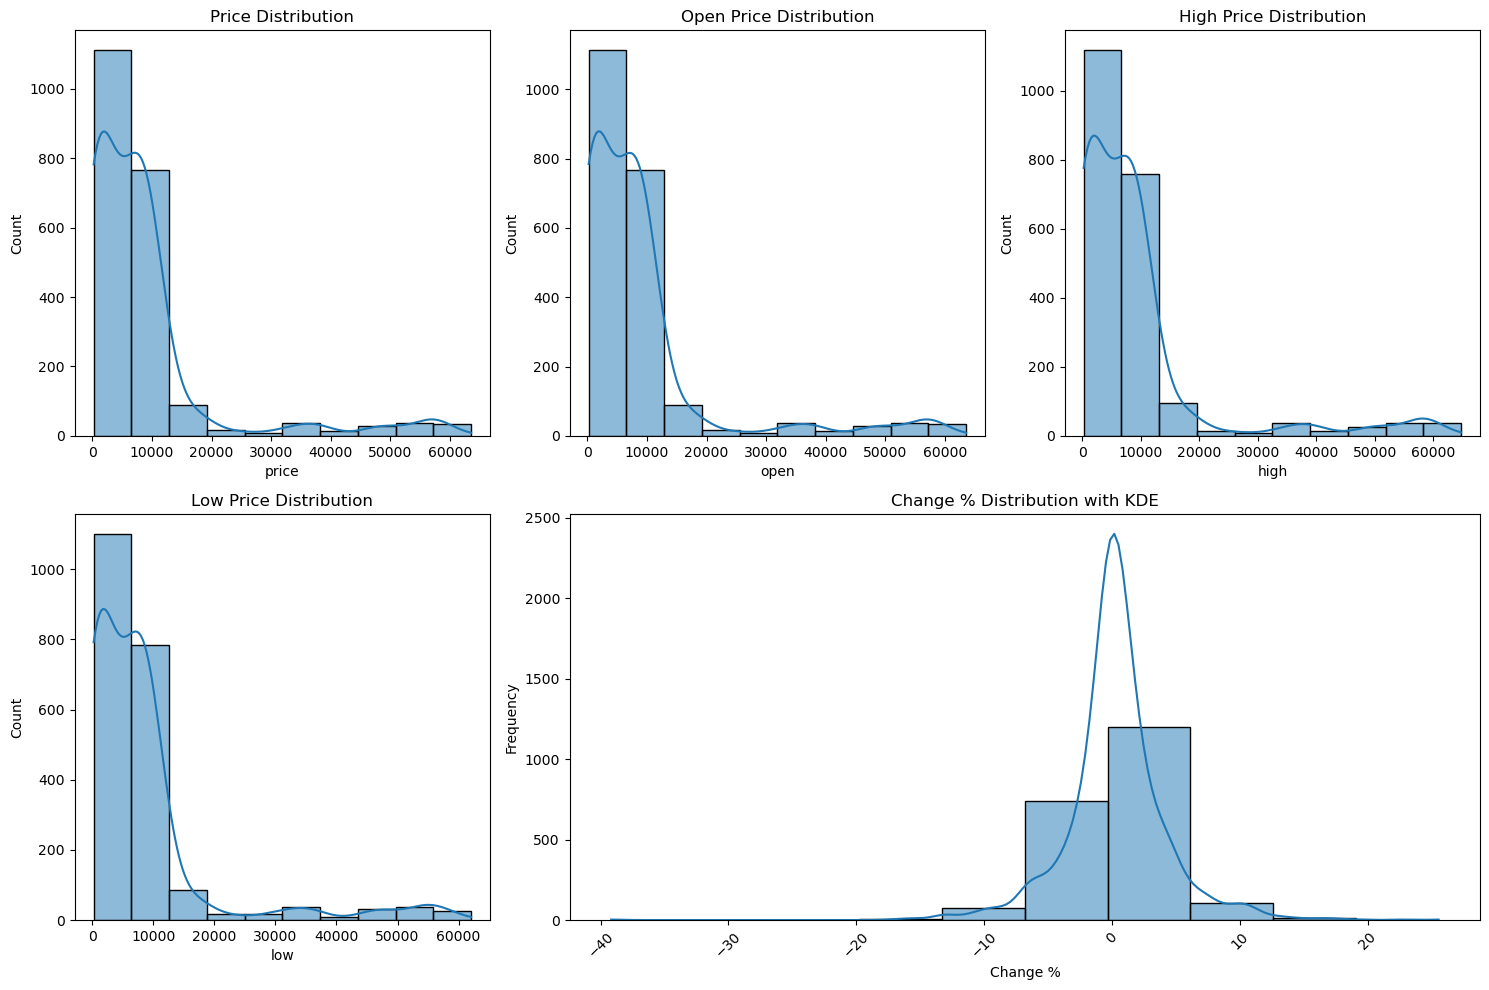

In [16]:
import matplotlib.gridspec as gridspec
# Set up the grid layout (2 rows, 3 columns)
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])  # Define the grid

# Plot each distribution
ax1 = plt.subplot(gs[0, 0])
sns.histplot(df_1['price'], bins=10, kde=True, ax=ax1)
ax1.set_title('Price Distribution')

ax2 = plt.subplot(gs[0, 1])
sns.histplot(df_1['open'], bins=10, kde=True, ax=ax2)
ax2.set_title('Open Price Distribution')

ax3 = plt.subplot(gs[0, 2])
sns.histplot(df_1['high'], bins=10, kde=True, ax=ax3)
ax3.set_title('High Price Distribution')

ax4 = plt.subplot(gs[1, 0])
sns.histplot(df_1['low'], bins=10, kde=True, ax=ax4)
ax4.set_title('Low Price Distribution')

# Make the 'change %' plot span two columns (1,1 and 1,2)
ax5 = plt.subplot(gs[1, 1:3])  # Span two columns
sns.histplot(df_1['change %'], bins=10, kde=True, ax=ax5)  # Use histplot with KDE=True
ax5.set_title('Change % Distribution with KDE')
ax5.set_xlabel('Change %')
ax5.set_ylabel('Frequency')

# Rotate tick labels without using FixedFormatter
ax5.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

In [17]:
df_1['change % bin'].value_counts()

change % bin
0% to 5%        991
-5% to 0%       824
5% to 10%       132
-10% to -5%     125
10% to 20%       42
-20% to -10%     29
20% to 30%        2
-40% to -30%      1
-30% to -20%      0
Name: count, dtype: int64

##### Checking veriance of each bin

In [18]:
grouped_data = [group['price'].values for name, group in df_1.groupby('change % bin') if len(group) > 0]

# Check each group for size and variance
for idx, group in enumerate(grouped_data):
    print(f"Group {idx + 1}: size = {len(group)}, variance = {np.var(group)}")


Group 1: size = 1, variance = 0.0
Group 2: size = 29, variance = 124100002.56380498
Group 3: size = 125, variance = 181864560.08003458
Group 4: size = 824, variance = 142176486.09207904
Group 5: size = 991, variance = 132113801.68381077
Group 6: size = 132, variance = 216380411.6338493
Group 7: size = 42, variance = 146152841.7804535
Group 8: size = 2, variance = 48890161.622499995


##### ANOVA Analysis on Change %

In [19]:
filtered_grouped_data = [group for group in grouped_data if len(group) > 1 and np.var(group) > 0]

In [20]:
import scipy.stats as stats

ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415
Critical value (alpha = 0.05): 2.102818483756683


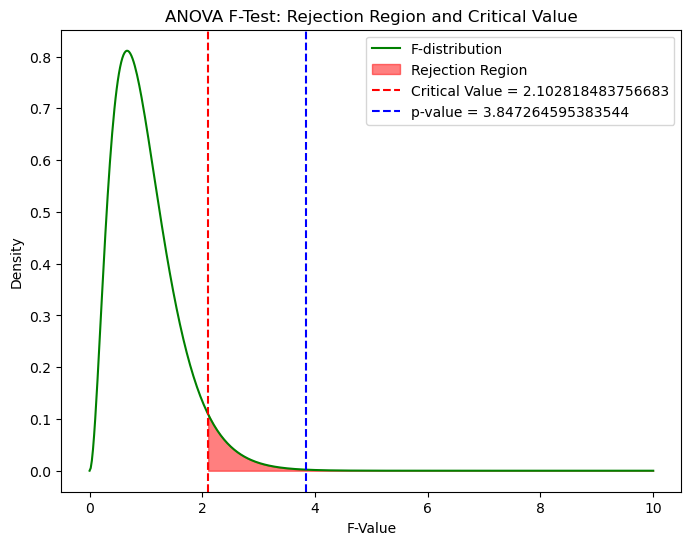

In [21]:

# Assuming filtered_grouped_data is already defined
if len(filtered_grouped_data) > 1:
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*filtered_grouped_data)

    # Degrees of freedom
    df_between = len(filtered_grouped_data) - 1  # df1: Number of groups - 1
    df_within = sum([len(group) for group in filtered_grouped_data]) - len(filtered_grouped_data)  # df2: Total observations - Number of groups
    
    # Calculate critical value (alpha = 0.05)
    alpha = 0.05
    critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

    # Print the results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_result.statistic}')
    print(f'p-value: {anova_result.pvalue}')
    print(f'Critical value (alpha = {alpha}): {critical_value}')

    # Calculate x for F-distribution
    # Here we set an upper limit for x. You can adjust this based on your needs.
    x_max = max(critical_value + 5, 10)  # Ensures x extends beyond the critical value
    x = np.linspace(0, x_max, 500)  # Create x values

    # F-distribution PDF
    y = stats.f.pdf(x, df_between, df_within)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='F-distribution', color='green')

    # Highlight the rejection region
    plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Rejection Region')

    # Mark the critical value and F-value
    plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value}')
    plt.axvline(anova_result.statistic, color='blue', linestyle='--', label=f'p-value = {anova_result.statistic}')

    # Add labels and title
    plt.title('ANOVA F-Test: Rejection Region and Critical Value')
    plt.xlabel('F-Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("Not enough valid groups with non-zero variance for ANOVA.")


F value > critical value, <br> we reject the null hypothesis (which states there is no difference between groups). This indicates a significant difference between groups, suggesting that this column is important.

##### Kruskal-Wallis Analysis

In [22]:
import pandas as pd
from scipy.stats import kruskal


# Extract relevant numeric columns for comparison
numeric_columns = ['price', 'open', 'high', 'low', 'vol.']
groups = [df_1[col].values for col in numeric_columns]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups (reject H0).")
else:
    print("There is no significant difference between the groups (fail to reject H0).")


Kruskal-Wallis H-statistic: 4922.78557560026
P-value: 0.0
There is a significant difference between the groups (reject H0).


### Looking for the outlier

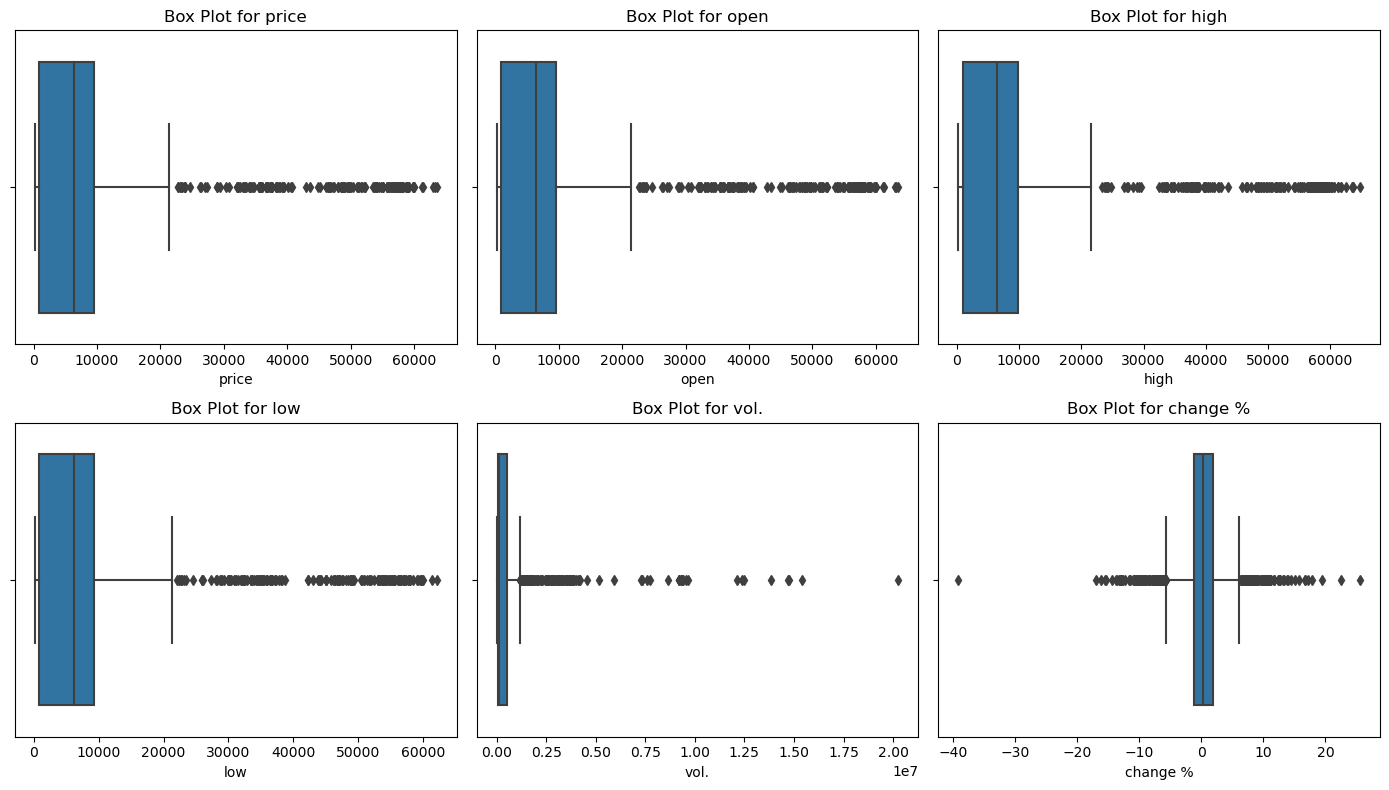

In [23]:
# Assuming your dataset is loaded into a DataFrame called 'data'

# Visualizing with box plots for numeric columns
numeric_cols = ['price', 'open', 'high', 'low', 'vol.', 'change %']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_1[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Z-score method for detecting outliers in 'price'
df_1['zscore_price'] = (df_1['price'] - df_1['price'].mean()) / df_1['price'].std()
outliers_zscore_price = df_1[df_1['zscore_price'].abs() > 3]

# IQR method for detecting outliers in 'price'
Q1 = df_1['price'].quantile(0.25)
Q3 = df_1['price'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr_price = df_1[(df_1['price'] < (Q1 - 1.5 * IQR)) | (df_1['price'] > (Q3 + 1.5 * IQR))]

# Similarly, you can repeat the Z-score and IQR methods for other numeric columns like 'vol.' or 'change %'


### Moving Averages - Simple Moving Average and Exponential Moving Average

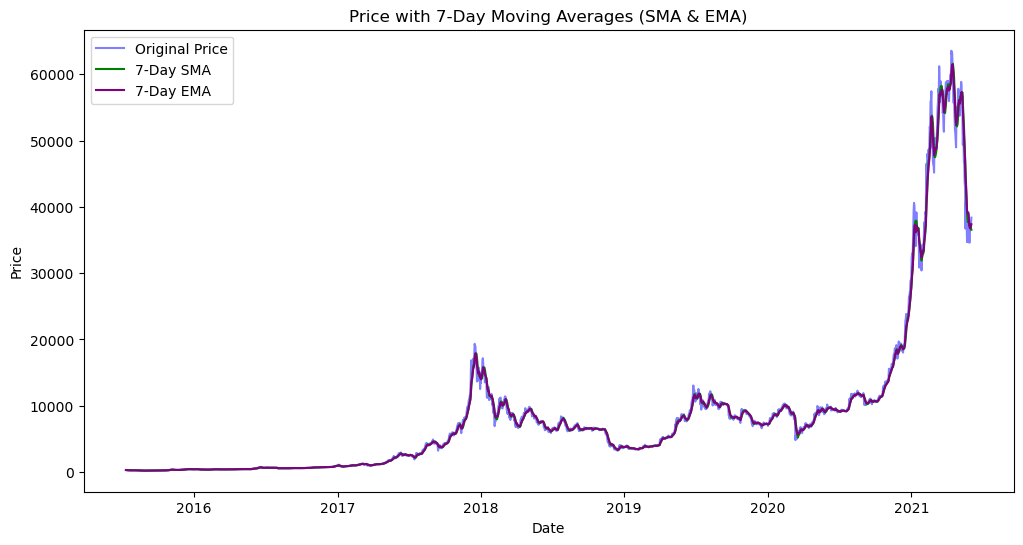

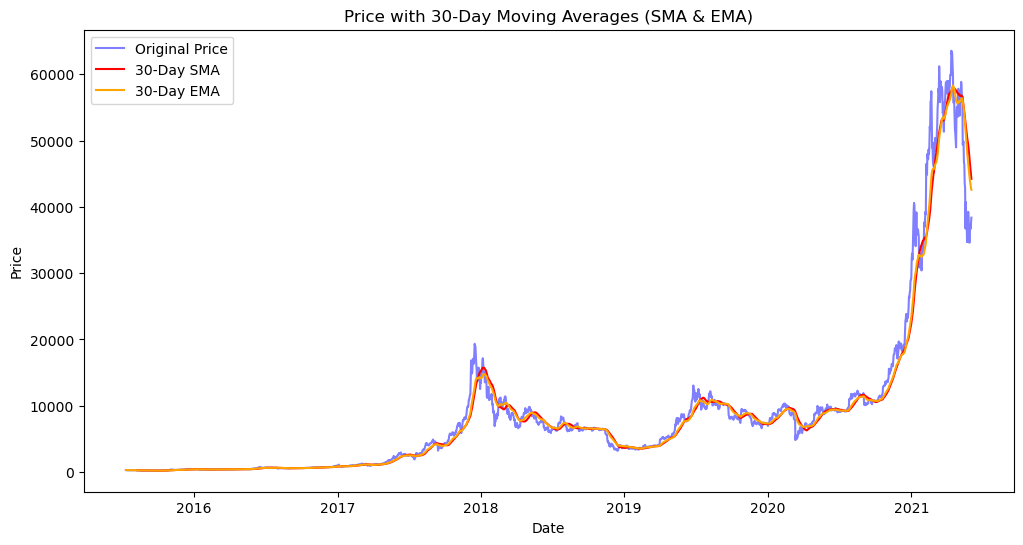

In [24]:

# Simple Moving Average (SMA)
df_1['SMA_7'] = df_1['price'].rolling(window=7).mean()  # 7-day moving average (short-term)
df_1['SMA_30'] = df_1['price'].rolling(window=30).mean()  # 30-day moving average (long-term)

# Exponential Moving Average (EMA)
df_1['EMA_7'] = df_1['price'].ewm(span=7, adjust=False).mean()  # 7-day exponential moving average (short-term)
df_1['EMA_30'] = df_1['price'].ewm(span=30, adjust=False).mean()  # 30-day exponential moving average (long-term)

# Plotting 7-day Moving Averages (SMA and EMA)
plt.figure(figsize=(12, 6))

# Original data
plt.plot(df_1.index, df_1['price'], label='Original Price', color='blue', alpha=0.5)

# 7-Day Moving Averages
plt.plot(df_1.index, df_1['SMA_7'], label='7-Day SMA', color='green')
plt.plot(df_1.index, df_1['EMA_7'], label='7-Day EMA', color='purple')

# Labels and Legends
plt.title('Price with 7-Day Moving Averages (SMA & EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting 30-day Moving Averages (SMA and EMA)
plt.figure(figsize=(12, 6))

# Original data
plt.plot(df_1.index, df_1['price'], label='Original Price', color='blue', alpha=0.5)

# 30-Day Moving Averages
plt.plot(df_1.index, df_1['SMA_30'], label='30-Day SMA', color='red')
plt.plot(df_1.index, df_1['EMA_30'], label='30-Day EMA', color='orange')

# Labels and Legends
plt.title('Price with 30-Day Moving Averages (SMA & EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### ACF and PACF

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

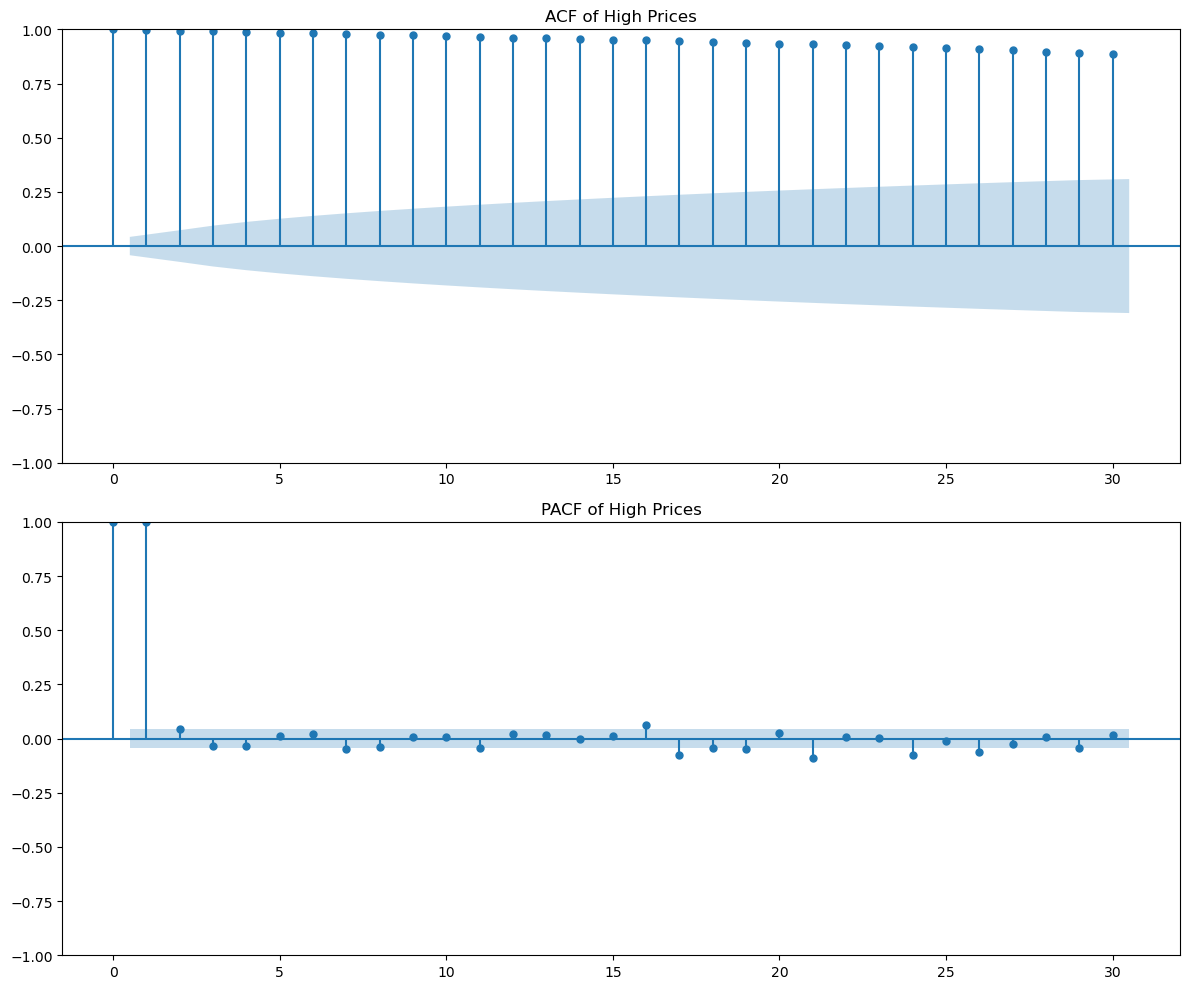

In [72]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
plot_acf(df_1['price'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of High Prices')

plt.subplot(212)
plot_pacf(df_1['price'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF of High Prices')

plt.tight_layout()
plt.show()

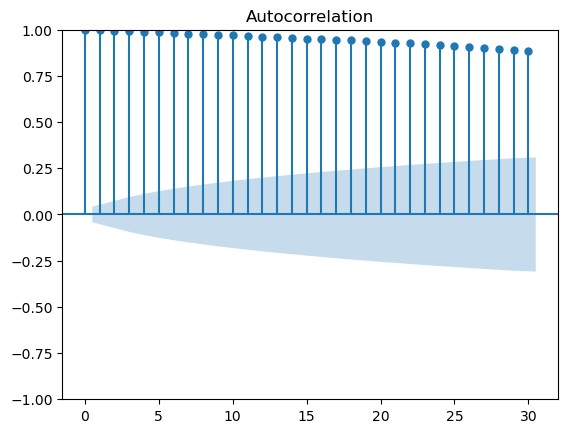

In [27]:
acf_plot = plot_acf(df_1.price, lags= 30)

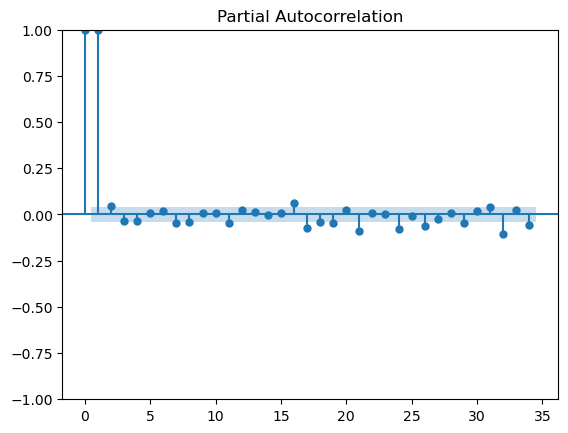

In [28]:
pacf_plot = plot_pacf(df_1.price)

### Is there any seasonal trend?

Looking at the single year (2020) seasonal_decomposition graph, ACF and PACF

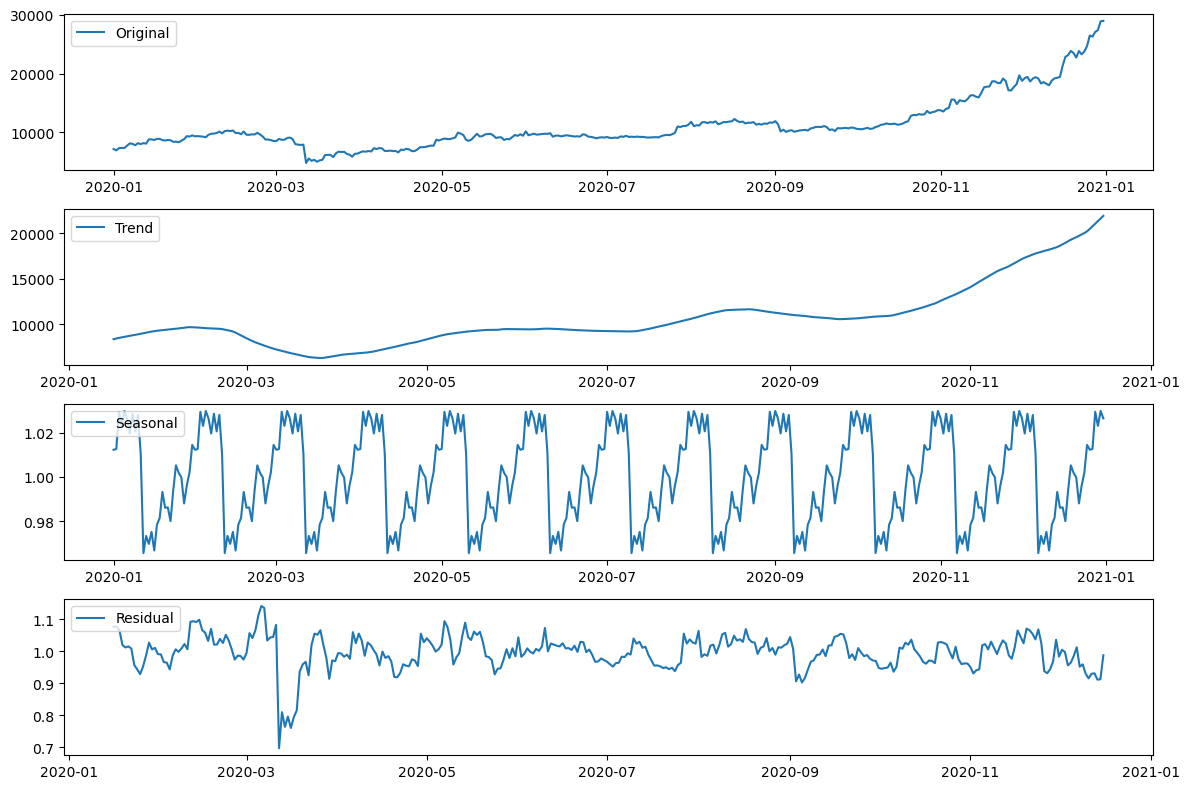

Dickey–Fuller test: p=1.000000


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df_1['year'] = df_1.index.year  # Extract year from the index if it's a DateTimeIndex
df_single_year = df_1[df_1['year'] == 2020]

# Decompose the 'high' column
decomposition = seasonal_decompose(df_single_year['price'], model='multiplicative', period=30)  # Adjust the period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_single_year['price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(df_single_year.price)[1])



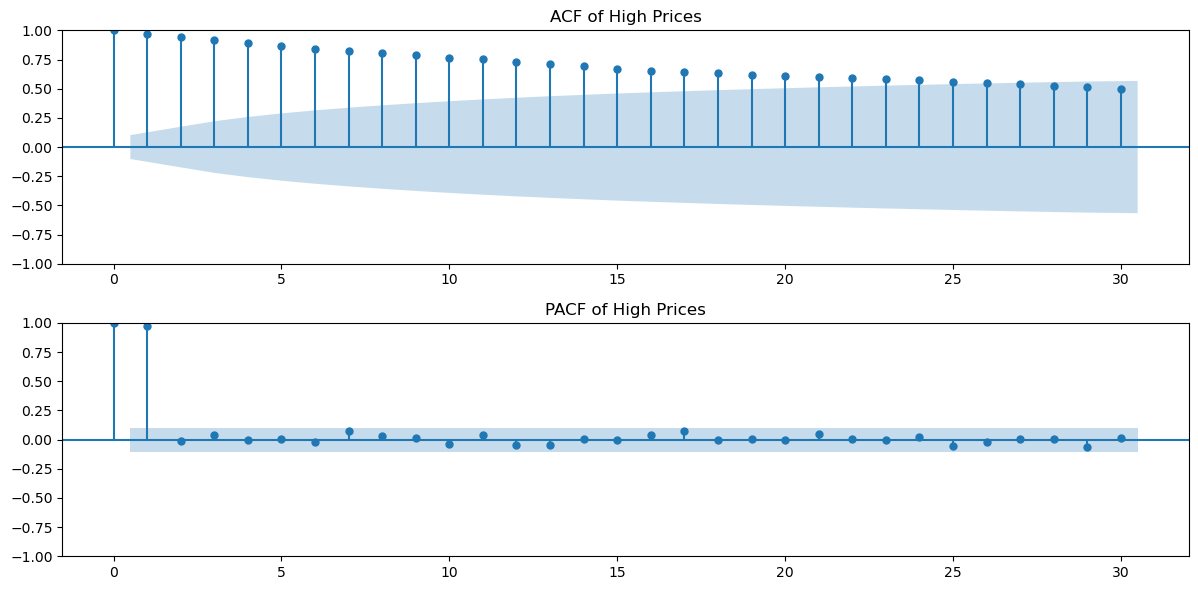

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_single_year['price'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of High Prices')

plt.subplot(212)
plot_pacf(df_single_year['price'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF of High Prices')

plt.tight_layout()
plt.show()

if you look into the seasonal decomposition graph, it shows positive but if you analise ACF, it shows nothing on seasonal trend. This means they are contradiction eachother.

## ARIMA Model Development and Analysis

In [31]:
df_2 = df_1[['price',	'open',	'high',	'low',	'vol.',	'change %',	'change % bin']]

In [32]:
df_2.sample()


,price,open,high,low,vol.,change %,change % bin
date,,,,,,,
2020-02-24,9662.7,9943.2,9981.0,9507.0,980000.0,-2.82,-5% to 0%


Using boxcox to make the dataset (price) stationery to train on ARIMA model

In [33]:
from scipy.stats import boxcox
df_2['price_boxcox'], lam = boxcox(df_2['price'])


/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_42092/4228238981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['price_boxcox'], lam = boxcox(df_2['price'])


In [34]:
df_2.head()

,price,open,high,low,vol.,change %,change % bin,price_boxcox
date,,,,,,,,
2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,5% to 10%,8.086485
2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,-10% to -5%,7.959257
2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,-5% to 0%,7.936859
2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,-5% to 0%,7.912886
2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,-5% to 0%,7.866858


Trend graph after boxcox

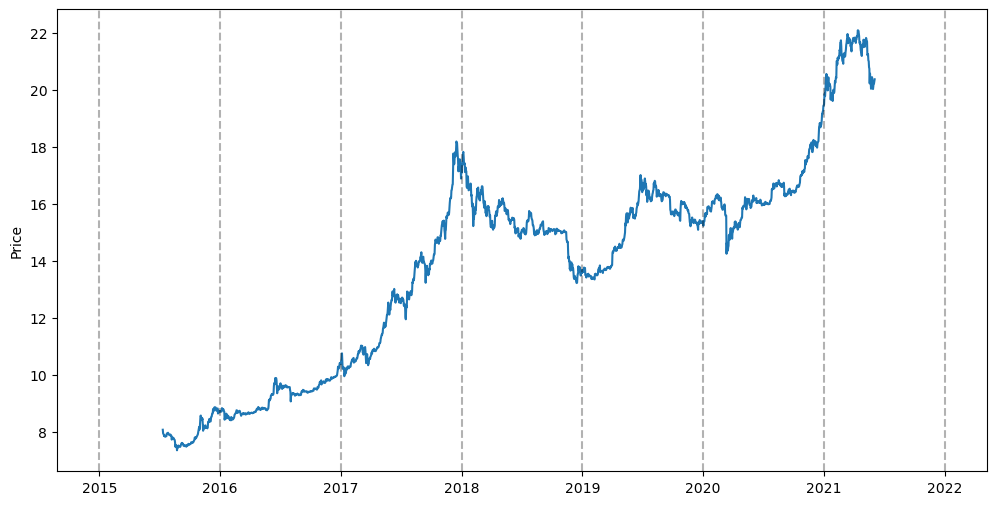

In [35]:
plt.figure(figsize= (12,6))
plt.plot(df_2.price_boxcox)
plt.ylabel('Price')
for year in range (2015, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.3)

In [36]:
df_2['price_boxcox'].describe()

count    2146.000000
mean       13.886005
std         3.646996
min         7.365775
25%        10.246475
50%        15.007764
75%        16.125160
max        22.097281
Name: price_boxcox, dtype: float64

First differential and Dickey–Fuller test on boxcox price show the dataset is stationery 

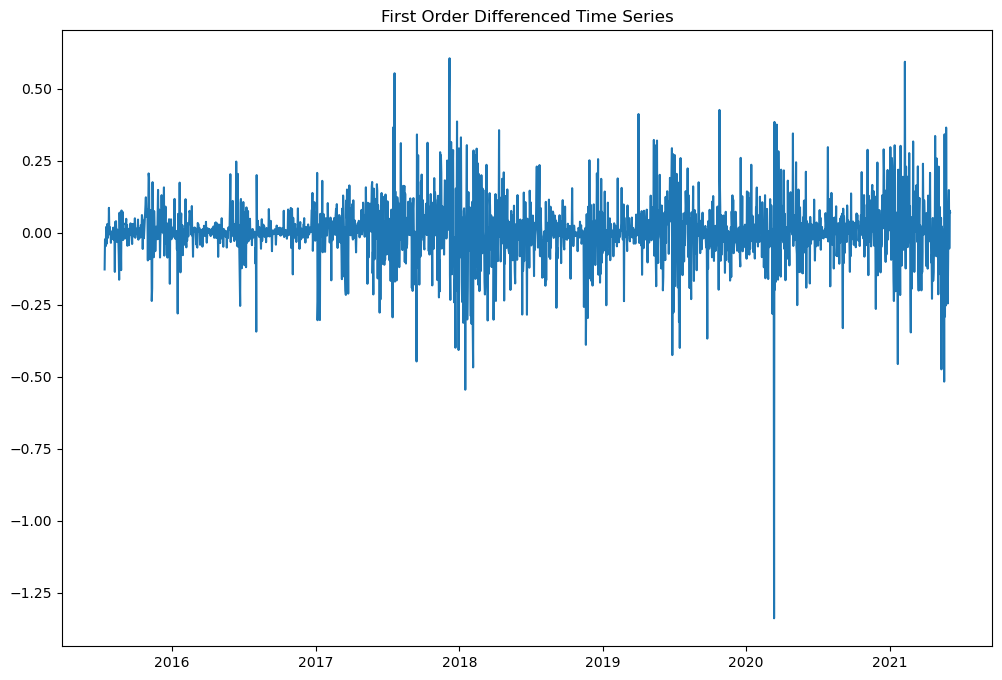

Dickey–Fuller test: p=0.000000


In [37]:
# First-order differencing
df_diff = df_2['price_boxcox'].diff()

# Drop NaN values resulting from differencing
df_diff = df_diff.dropna()

# Plot the differenced data to visually inspect it
plt.figure(figsize=(12, 8))
plt.plot(df_diff)
plt.title('First Order Differenced Time Series')
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(df_diff)[1])

<Axes: ylabel='Density'>

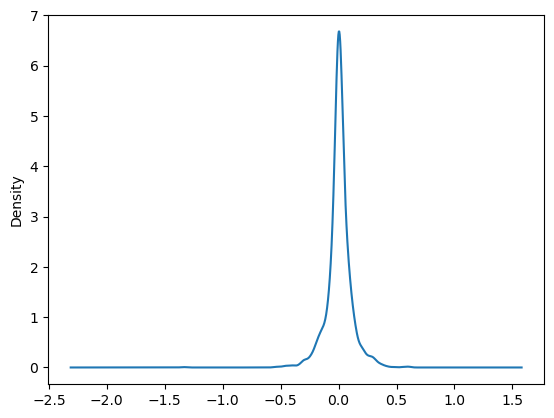

In [38]:
df_diff.plot(kind='kde')

In [39]:
adf_result = adfuller(df_diff)

# Extract the ADF statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Print the ADF statistic and p-value with formatting to show the full number
print(f"ADF Statistic: {adf_statistic:.10f}")
print(f"p-value: {p_value:.10f}")


ADF Statistic: -31.8358527332
p-value: 0.0000000000


Plotting the PACF and ACF to analyze what could be the value of parameter of ARIMA model (p,d,q)

<Figure size 1200x800 with 0 Axes>

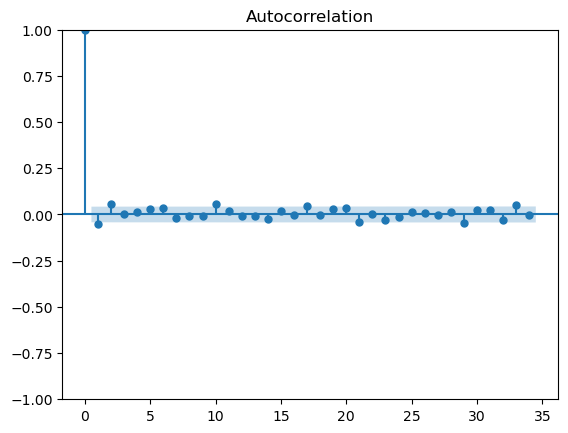

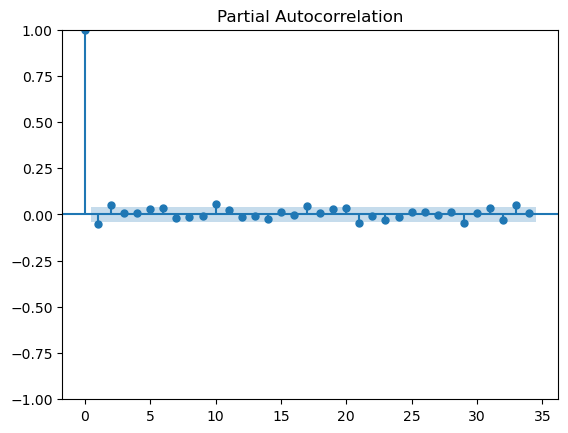

In [40]:
plt.figure(figsize=(12, 8))
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()

### Trained on entire dataset

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA with first-order differencing (d=1)
model = ARIMA(df_2['price_boxcox'], order=(1, 1, 1))  # d=1 for first-order differencing

# Fit the model
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           price_boxcox   No. Observations:                 2146
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1714.011
Date:                Thu, 31 Oct 2024   AIC                          -3422.021
Time:                        00:21:22   BIC                          -3405.008
Sample:                             0   HQIC                         -3415.796
                               - 2146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5722      0.183     -3.128      0.002      -0.931      -0.214
ma.L1          0.5187      0.188      2.754      0.006       0.150       0.888
sigma2         0.0118      0.000     92.064      0.0

/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Inversing boxcox on prediction for the better visualization and analysis

In [42]:
from scipy.special import inv_boxcox
# Ensure the index is a datetime index

df_2.index = pd.to_datetime(df_2.index)
start_index = df_2.index.get_loc(df_2.index[0])
end_index = df_2.index.get_loc(df_2.index[-1])

# # Predict for the entire dataset (in-sample prediction)
# start_index = df_2.index[0]
# end_index = df_2.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')
predictions = inv_boxcox(predictions, lam)


#### Graph of prediction 

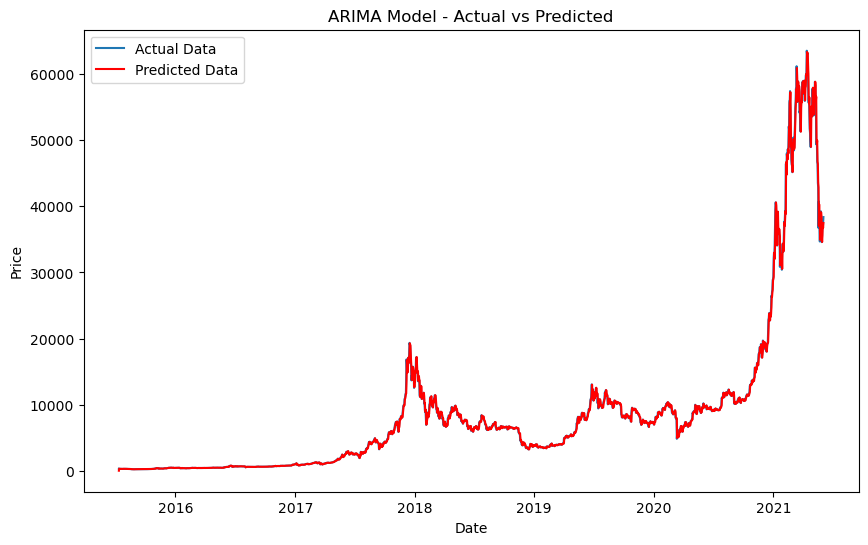

In [43]:
# Plot the actual data and predictions
plt.figure(figsize=(10,6))

# Plot the actual data
plt.plot(df_2.index, df_2['price'], label='Actual Data')

# Plot the predicted data
plt.plot(df_2.index, predictions, label='Predicted Data', color='red')

# Add labels and legend
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

### Model Trained  on split dataset

In [44]:
from sklearn.model_selection import train_test_split

# Assume df_1['price'] contains the time series data
# dat = df_2['price_boxcox']
train_size = int(len(df_2)*0.8)

train, test = df_2['price_boxcox'][:train_size], df_2['price_boxcox'][train_size:]

# Fit the ARIMA model on the training data (replace p, d, q with your values)
model_split = ARIMA(train, order=(10, 1, 10))  # d=1 for first differencing

# Fit the model
model_split_fit = model_split.fit()



/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

In [45]:
df_2.index = pd.to_datetime(df_2.index) 

In [46]:
df_2.sample()

,price,open,high,low,vol.,change %,change % bin,price_boxcox
date,,,,,,,,
2020-05-05,9001.0,8874.2,9078.7,8800.4,1050000.0,1.42,0% to 5%,15.9498


In [47]:
start_index = df_2.index.get_loc(df_2.index[0])
end_index = df_2.index.get_loc(df_2.index[-1])
predictions_split = model_split_fit.predict(start=start_index, end=end_index)
predictions_split = inv_boxcox(predictions_split, lam)



/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [48]:

# predictions_split.index = df_2.index[train_size:end_index + 1]

# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({
    'Date': df_2.index,
    'Predicted_Price': predictions_split
})

# Set the index to 'Date' for easier plotting or analysis
df_predictions.set_index('Date', inplace=True)

# Display the resulting DataFrame
df_predictions.sample()

,Predicted_Price
Date,
2019-09-17,10253.721573


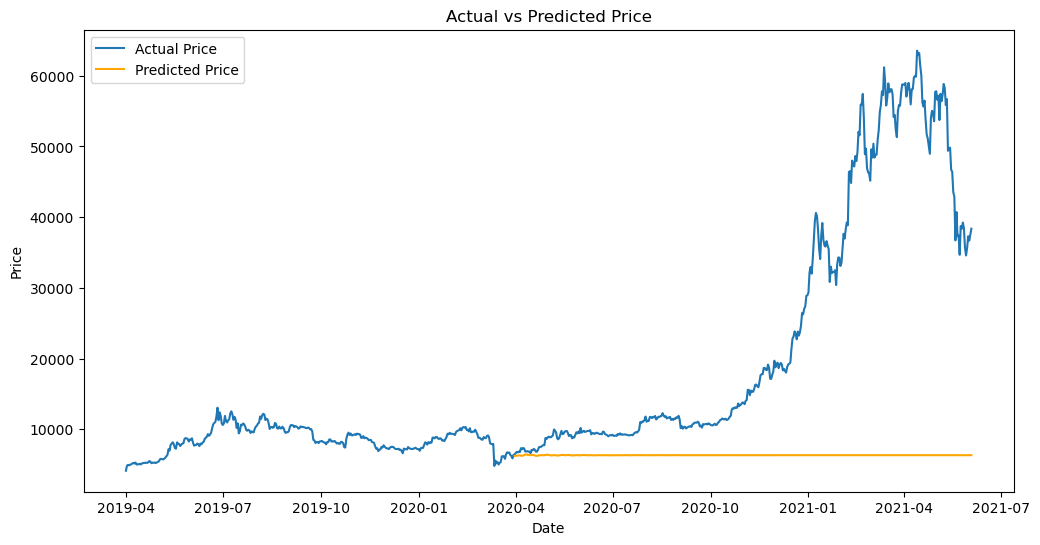

In [75]:
# Plot the actual prices and the predicted prices on the same time frame
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(df_2['price'].iloc[train_size-365:], label='Actual Price')

# Plot predicted prices (ensure proper alignment with test set)
plt.plot( df_predictions['Predicted_Price'].iloc[train_size:], label='Predicted Price', color='orange')

# Add vertical lines for new years
# for year in range(2020, 2023):
#     plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.3)

# Add labels, title, and legend
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Actual vs Predicted Price')
plt.legend()

# Show the plot
plt.show()

### Facebook Prophet Model

In [50]:
from prophet import Prophet

In [51]:
df_2.head()


,price,open,high,low,vol.,change %,change % bin,price_boxcox
date,,,,,,,,
2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,5% to 10%,8.086485
2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,-10% to -5%,7.959257
2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,-5% to 0%,7.936859
2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,-5% to 0%,7.912886
2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,-5% to 0%,7.866858


In [52]:


# Prepare the data for Prophet
# Prophet requires two columns: 'ds' (date) and 'y' (value to forecast)
df_prophet = df_2[['price_boxcox']].reset_index()  # Assuming the index is the date
df_prophet.columns = ['ds', 'y']  # Prophet expects these exact column names

# Split into training and testing sets (80-20 split)
train_size_prop = int(len(df_prophet) * 0.5)
train_prophet = df_prophet.iloc[:train_size_prop]
test_prophet = df_prophet.iloc[train_size_prop:]

# Initialize the Prophet model
model_prop = Prophet()

# Fit the model on the training data
model_prop.fit(train_prophet)



00:21:27 - cmdstanpy - INFO - Chain [1] start processing
00:21:27 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
train_prophet.head()



,ds,y
0,2015-07-12,8.086485
1,2015-07-13,7.959257
2,2015-07-14,7.936859
3,2015-07-15,7.912886
4,2015-07-16,7.866858


In [54]:
# Make future predictions (same length as the test set)
# future = model_prop.make_future_dataframe(periods=len(test_prophet))
future_test = test_prophet[['ds']]

In [55]:

# Predict the future values
forecast_prop = model_prop.predict(future_test)
# Extract the predicted values for the test period
predictions_prophet = forecast_prop[['ds', 'yhat']]

# Optionally, combine actual and predicted values in a DataFrame for comparison
df_prophet_results = test_prophet.copy()
predictions_prophet['yhat'] = inv_boxcox(predictions_prophet['yhat'], lam)
df_prophet_results['Predicted_Price'] = predictions_prophet['yhat'].values

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_42092/292922825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_prophet['yhat'] = inv_boxcox(predictions_prophet['yhat'], lam)


In [56]:
df_prophet_results.isna().sum()

ds                 0
y                  0
Predicted_Price    0
dtype: int64

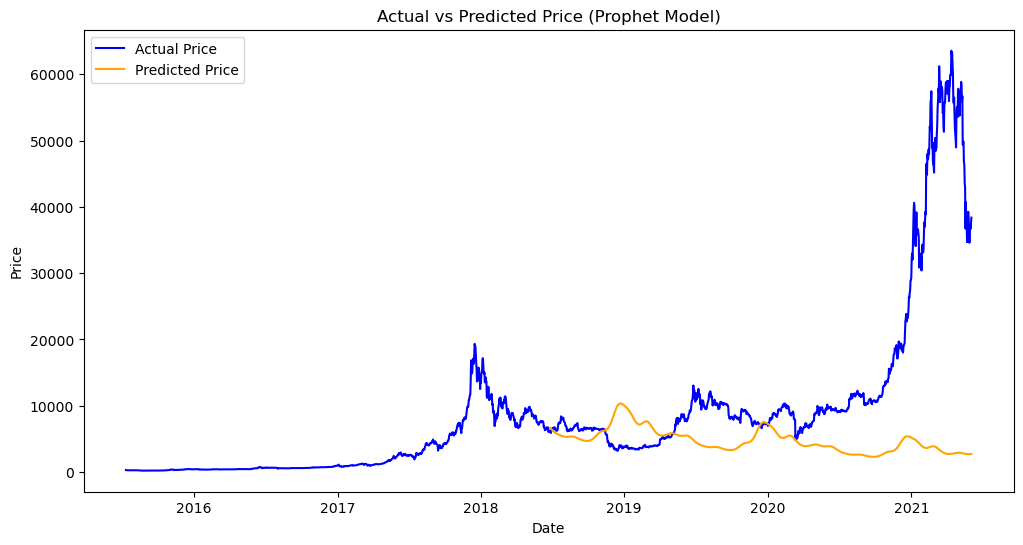

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df_2['price'], label='Actual Price', color='blue')
plt.plot(df_prophet_results['ds'], df_prophet_results['Predicted_Price'], label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (Prophet Model)')
plt.legend()
plt.show()

In [58]:
functions.calculate_metrics(test_prophet['y'], df_prophet_results['Predicted_Price'])

Mean Absolute Error (MAE): 4776.375462256894
Mean Squared Error (MSE): 25937561.19781954
Root Mean Squared Error (RMSE): 5092.893205027918
R-squared (R²): -5310371.260200226


{'MAE': 4776.375462256894,
 'MSE': 25937561.19781954,
 'RMSE': 5092.893205027918,
 'R²': -5310371.260200226}

##### Prophet Model with Cross-validation with expanding window

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

df_prophet = df_2[['price']].reset_index()  # Assuming the index is the date
df_prophet.columns = ['ds', 'y']

# Initialize empty lists to store evaluation metrics for each fold
rmse_scores = []
mae_scores = []

# Set the expanding window parameters
initial_train_size = int(len(df_prophet) * 0.5)  # Start with 50% of data as initial training
test_size = 120  # Forecast 120 days ahead in each iteration

# Expanding window cross-validation loop
for i in range(initial_train_size, len(df_prophet) - test_size, test_size):
    # Define training and testing sets
    train_data = df_prophet.iloc[:i]
    test_data = df_prophet.iloc[i:i + test_size]
    
    # Initialize and fit the Prophet model on the expanding training set
    model = Prophet()
    model.fit(train_data)
    
    # Prepare future dataframe for the test period
    future = test_data[['ds']]
    
    # Predict on the test set
    forecast = model.predict(future)
    
    predictions = forecast['yhat'].values
    
    # Compute the evaluation metrics (RMSE and MAE) on the original scale
    rmse = np.sqrt(mean_squared_error(test_data['y'], predictions))
    mae = mean_absolute_error(test_data['y'], predictions)
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    
    print(f"Fold ending at {test_data['ds'].iloc[-1]}: RMSE = {rmse}, MAE = {mae}")

# Optionally, print average scores across all folds
print("\nAverage RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))


00:21:28 - cmdstanpy - INFO - Chain [1] start processing
00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2018-10-24 00:00:00: RMSE = 639.681413907529, MAE = 436.03848857275796


00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-02-21 00:00:00: RMSE = 2396.0411362390814, MAE = 1987.3982643345919


00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-21 00:00:00: RMSE = 4875.7943588424105, MAE = 4236.113510938912


00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-10-19 00:00:00: RMSE = 4537.691697638132, MAE = 4404.571635934564


00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-02-16 00:00:00: RMSE = 4399.866888357455, MAE = 4140.018175673334


00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-15 00:00:00: RMSE = 2703.4716090789225, MAE = 2502.4940351779805


00:21:30 - cmdstanpy - INFO - Chain [1] done processing
00:21:30 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-10-13 00:00:00: RMSE = 2210.8227017835056, MAE = 1942.4487004156838


00:21:30 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-02-10 00:00:00: RMSE = 17143.504710048794, MAE = 14171.891730480063

Average RMSE: 4863.359314486978
Average MAE: 4227.621817690986


##### Cross-validation with Time Series Split

In [60]:
from sklearn.model_selection import TimeSeriesSplit

# Define the data for Prophet (ds = date, y = target value)
df_prophet = df_2[['price']].reset_index()  # Assuming the index is the date
df_prophet.columns = ['ds', 'y']

# Set up TimeSeriesSplit with the number of splits you want
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store results
rmse_scores = []
mae_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(df_prophet):
    # Split the data into train and test sets based on the split indices
    train_prophet, test_prophet = df_prophet.iloc[train_index], df_prophet.iloc[test_index]
    
    # Initialize and fit the Prophet model on the training data
    model = Prophet()
    model.fit(train_prophet)
    
    # Prepare a future dataframe for the dates in the test set
    future = test_prophet[['ds']]
    
    # Make predictions for the test period
    forecast = model.predict(future)
    
    # Calculate performance metrics for this split
    predictions = forecast['yhat'].values
    rmse = np.sqrt(mean_squared_error(test_prophet['y'], predictions))
    mae = mean_absolute_error(test_prophet['y'], predictions)
    
    # Append metrics to results lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    
    # Output results for each split
    print(f"Fold ending at {test_prophet['ds'].iloc[-1]}: RMSE = {rmse}, MAE = {mae}")

# Display average metrics across all splits
print("\nAverage RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))


00:21:30 - cmdstanpy - INFO - Chain [1] start processing
00:21:30 - cmdstanpy - INFO - Chain [1] done processing
00:21:30 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2017-07-06 00:00:00: RMSE = 434.6060065406391, MAE = 400.73433530982845


00:21:30 - cmdstanpy - INFO - Chain [1] done processing
00:21:30 - cmdstanpy - INFO - Chain [1] start processing
00:21:31 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2018-06-28 00:00:00: RMSE = 4608.934792513443, MAE = 3225.6563650632447


00:21:31 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2019-06-20 00:00:00: RMSE = 3139.6979384666465, MAE = 2303.2001069627695


00:21:31 - cmdstanpy - INFO - Chain [1] done processing
00:21:31 - cmdstanpy - INFO - Chain [1] start processing


Fold ending at 2020-06-11 00:00:00: RMSE = 3943.357470389842, MAE = 3689.936828250869


00:21:31 - cmdstanpy - INFO - Chain [1] done processing


Fold ending at 2021-06-03 00:00:00: RMSE = 27375.179318683477, MAE = 19747.31766800294

Average RMSE: 7900.35510531881
Average MAE: 5873.369060717931


## LSTM model

In [61]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

In [62]:
price = df_2.price
# As usual split data, 70, 30
X = price
size = int(len(X) * 0.7)
train_df_lstm, test_df_lstm = X[0:size], X[size:len(X)]
training_values = train_df_lstm.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [63]:
# creates model
model_lstm = Sequential()
model_lstm.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model_lstm.add(Dense(1))

/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model_lstm.compile(loss="mean_squared_error",optimizer="adam")

In [65]:
# fit the model to the training data
model_lstm.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - loss: 0.0642 
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.0436
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.0303
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.0233
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.0203
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.0163
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.0118
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.0089
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0054
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.0032
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.0018
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.0011
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 7.4331e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 6.1265e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/

In [76]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 10)       │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 1)        │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,475 (5.77 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 984 (3.85 KB)

In [66]:
# assign test and predicted values + reshaping + converting back from scaler
test_values_lstm = test_df_lstm.values
test_values_lstm = np.reshape(test_values_lstm, (len(test_values_lstm), 1))
test_values_lstm = scaler.transform(test_values_lstm)
test_values_lstm = np.reshape(test_values_lstm, (len(test_values_lstm), 1, 1))
predicted_price_lstm = model_lstm.predict(test_values_lstm)
predicted_price_lstm = np.reshape(predicted_price_lstm, (len(predicted_price_lstm), 1))
predicted_price_lstm = scaler.inverse_transform(predicted_price_lstm)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [67]:
df_predicted_price_lstm = pd.DataFrame(predicted_price_lstm, columns=['Predicted_Price'])

In [68]:
df_predicted_price_lstm['date'] = test_df_lstm.index

In [69]:
df_predicted_price_lstm.head()

,Predicted_Price,date
0,9445.612305,2019-08-30
1,9455.510742,2019-08-31
2,9604.182617,2019-09-01
3,10294.044922,2019-09-02
4,10591.004883,2019-09-03


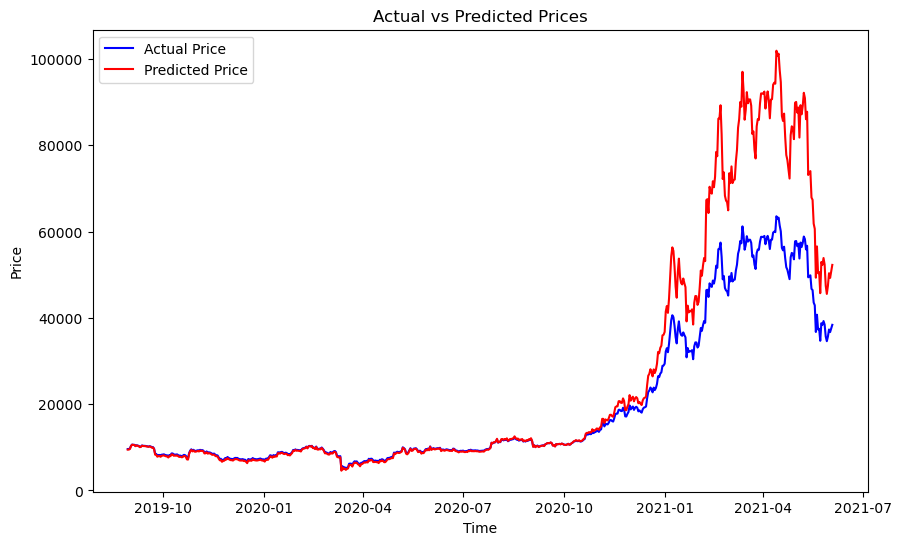

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(test_df_lstm, label='Actual Price', color='blue')
plt.plot(df_predicted_price_lstm['date'], df_predicted_price_lstm['Predicted_Price'], label='Predicted Price', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
functions.calculate_metrics(test_df_lstm, df_predicted_price_lstm['Predicted_Price'])

Mean Absolute Error (MAE): 5776.792596776737
Mean Squared Error (MSE): 142606692.9304308
Root Mean Squared Error (RMSE): 11941.804425229497
R-squared (R²): 0.5016200279084875


{'MAE': 5776.792596776737,
 'MSE': 142606692.9304308,
 'RMSE': 11941.804425229497,
 'R²': 0.5016200279084875}